In [3]:
import pandas as pd
import os

### Importing all csv into single file

In [16]:
all_months_data = pd.DataFrame()
files = [file for file in os.listdir('./Sales_Data')]

for file in files:
    df = pd.read_csv('./Sales_Data/'+ file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_months.csv', index = False)



In [21]:
all_data = pd.read_csv('all_months.csv')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

In [28]:
 all_data = all_data.dropna(how='any') #Drop rows with NaN 

In [34]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']  #Remove the rows with 'Or' under Order Date

In [43]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #convert object type into float using to_numeric
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Add column for months


In [83]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,CA


#### Add Sales column to display respective sales

In [46]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Question 1: What was the best month for sale? How much was earned in each month?

In [52]:
results = all_data.groupby('Month').sum()['Sales'] 

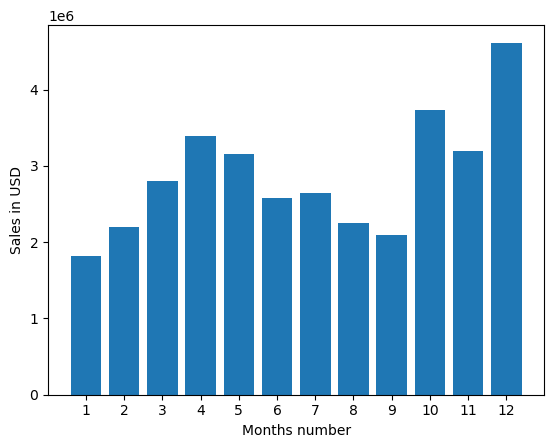

In [59]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results)
plt.xticks(months)
plt.xlabel('Months number')
plt.ylabel('Sales in USD')
plt.show()



### Solution : From above data we observe that December has the most sales of over 4 millions while January has been low in sales with just less than 2 Million

### Question 2: What city had highest number of sales?

#### Augment a column into table with city

In [99]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]
def get_city(address):
    return address.split(',')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [107]:
results = all_data.groupby('City').sum()['Sales']
results

City
 Atlanta (GA)          2795498.58
 Austin (TX)           1819581.75
 Boston (MA)           3661642.01
 Dallas (TX)           2767975.40
 Los Angeles (CA)      5452570.80
 New York City (NY)    4664317.43
 Portland (ME)          449758.27
 Portland (OR)         1870732.34
 San Francisco (CA)    8262203.91
 Seattle (WA)          2747755.48
Name: Sales, dtype: float64

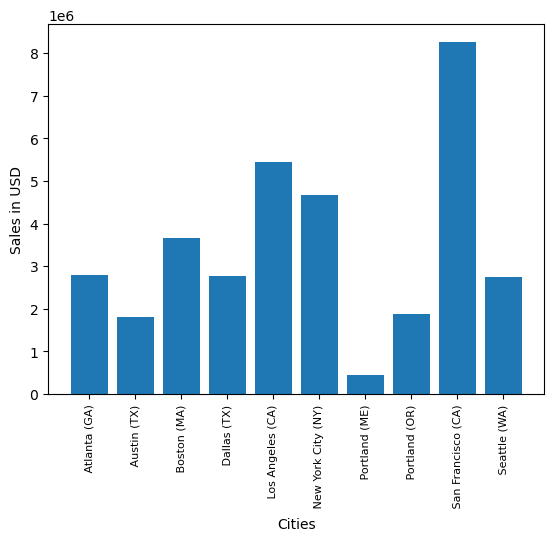

In [116]:
import matplotlib.pyplot as plt
cities = [city for city, df in all_data.groupby('City') ]  

plt.bar(cities, results)

plt.xticks(cities, rotation = 'vertical', size = 8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.show()

### From above we see San Francisco has highest amount in sales

### Question 3: What time should we display advertisements to maximize the likelihood of customer's buying product?

In [112]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [115]:
all_data['Time'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


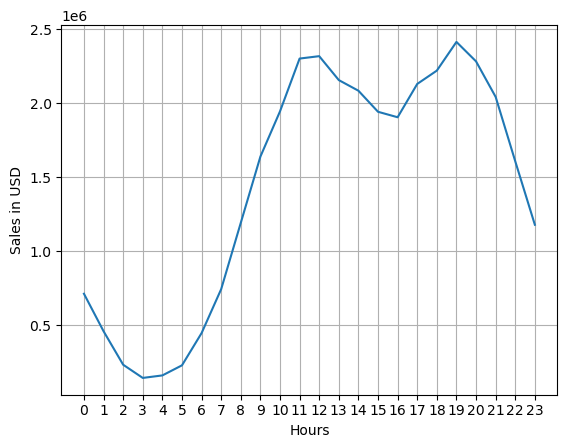

In [122]:
hours = [hour for hour, df in all_data.groupby('Time')]
results = all_data.groupby('Time').sum()['Sales']

plt.plot(hours, results)
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.grid()
plt.show()

### Solution: Displaying ads between 11 AM - 12 AM and between 7 PM - 8 PM would be ideal.

### Question 4: What products are most often sold together?

In [123]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [131]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]  #create a new data frame with only products with duplicate order ID

df['Grouped'] = df.groupby('Order ID')['Product'].transform( lambda x: ','.join(x)) 
df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_2364\2172140343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform( lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [140]:
df = df[['Order ID','Grouped']].drop_duplicates() 

In [142]:
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [160]:
from itertools import combinations
from collections import Counter

count = Counter() 

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
top_10 = count.most_common(10)

[(('Google Phone', 'USB-C Charging Cable'), 21),
 (('iPhone', 'Lightning Charging Cable'), 19),
 (('Google Phone', 'Wired Headphones'), 14),
 (('USB-C Charging Cable', 'Wired Headphones'), 12),
 (('Google Phone', 'Bose SoundSport Headphones'), 8),
 (('iPhone', 'Wired Headphones'), 8),
 (('iPhone', 'Apple Airpods Headphones'), 7),
 (('Vareebadd Phone', 'Wired Headphones'), 7),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 6),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 6)]

### Solution is that we see the pair of products and their frequency of purchase

### Question 5: What product sold the most and why?

In [165]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [170]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

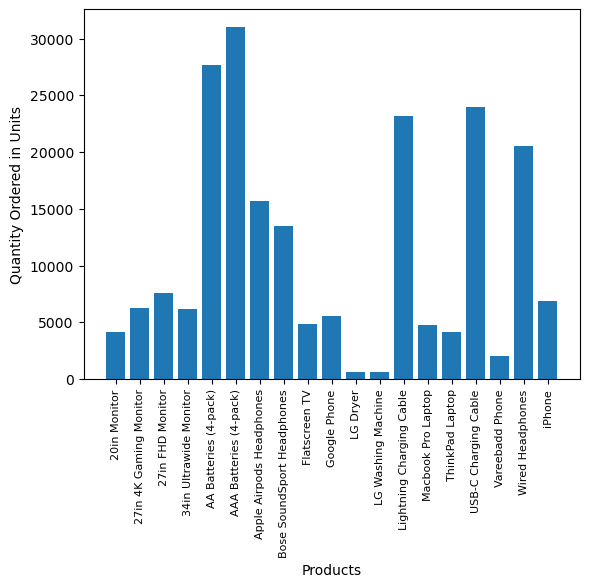

In [172]:
plt.bar(products, quantity_ordered)


plt.xlabel('Products')
plt.ylabel('Quantity Ordered in Units')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_2364\1016116289.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


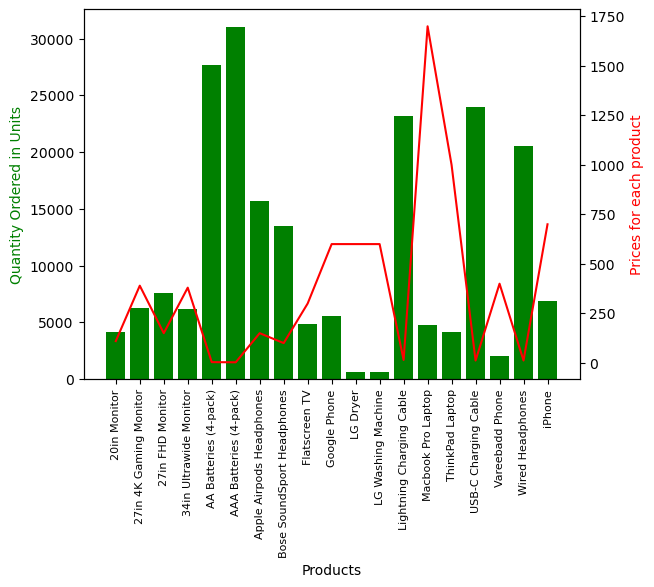

In [187]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'r')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered in Units', color='g')
ax2.set_ylabel('Prices for each product', color='r')


ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()

### Above graph infer that AA and AAA pack batteries are most sold as they are of low cost and are necessary day to day product